In [94]:
import pandas as pd
import numpy as np


In [95]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [96]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [97]:
df = data.iloc[:,2:]
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [98]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [99]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [100]:
#selecting samples

In [101]:
indexes = [100,200,300]
samples = df.loc[indexes,:]
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [102]:
new_data = df.drop('Grocery',axis=1)
new_data

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,12669,9656,214,2674,1338
1,7057,9810,1762,3293,1776
2,6353,8808,2405,3516,7844
3,13265,1196,6404,507,1788
4,22615,5410,3915,1777,5185
...,...,...,...,...,...
435,29703,12051,13135,182,2204
436,39228,1431,4510,93,2346
437,14531,15488,437,14841,1867
438,10290,1981,1038,168,2125


In [103]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_data,df.Grocery,test_size=0.2)


In [104]:
from sklearn.tree import DecisionTreeClassifier

dcc = DecisionTreeClassifier()
dcc = dcc.fit(x_train,y_train)

In [105]:
pred = dcc.predict(x_test)


In [106]:
from sklearn.metrics import r2_score,accuracy_score

r2score = r2_score(y_test,pred)
print("Prediction score is: {}".format(r2score))

Prediction score is: -2.2894125841976978


<AxesSubplot:>

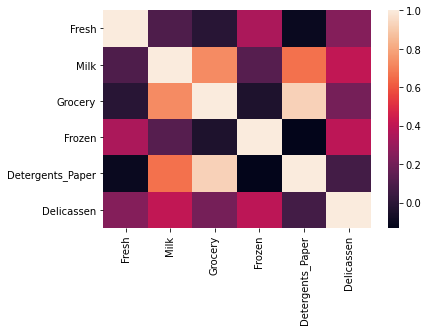

In [107]:
import seaborn as sns
sns.heatmap(df.corr())

In [120]:
log_data = np.log(df)
log_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [125]:
outlier = []
for feature in log_data.keys():
    q1= np.percentile(log_data[feature],25)
    q3 = np.percentile(log_data[feature],75)
    step = 1.5 * (q3-q1)
    list1 = log_data[~((log_data[feature] >= q1-step ) & (log_data[feature] <= q3 +step))].index.tolist()
    outlier.append(list1)



outlier




[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [126]:
seen = {}

dupes = []

for lista in outlier:
    for index in lista:
        if index not in seen:
            seen[index] =1
        else:
            if seen[index] ==1:
                dupes.append(index)
            seen[index] +=1
dupes = sorted(dupes)
dupes


[65, 66, 75, 128, 154]

In [127]:
good_data = log_data.drop(dupes,axis=0).reset_index(drop=True)

In [128]:
good_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
430,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
431,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
432,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
433,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1]).fit(good_data)
data_list = pca.transform(good_data)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(good_data)
red = pca.transform(good_data)

In [145]:
print( pd.DataFrame(data_list, columns = ['D1','D2','D3','D4','D5','D6']))

           D1        D2        D3        D4        D5        D6
0   -1.757983  0.009711 -0.959029 -1.682450  0.268019 -0.389131
1   -1.788665 -0.812251  0.231474 -0.003631  0.119381 -0.210648
2   -1.883353 -1.599135  1.320393 -0.543246 -0.393355 -0.311669
3    1.155265 -1.405201  0.542235  0.412669 -0.686453  0.640936
4   -0.784786 -2.394294  0.479768 -0.348316 -0.319098  0.061325
..        ...       ...       ...       ...       ...       ...
430  0.644850 -2.858285  0.637678  0.587900  1.951464  0.717030
431  3.184831 -1.944772  0.267656 -0.679896 -0.266346 -0.519384
432 -3.742535 -0.856146 -0.988483 -0.887897  0.050260  0.205777
433  1.669147 -0.397968  0.516105 -1.318861  0.091301  0.005611
434  0.739011  3.691448 -2.033477 -0.992689  0.310908 -0.173400

[435 rows x 6 columns]


In [155]:
from pca import pca
model = pca(n_components=2)
reduced_list = model.fit_transform(good_data)


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [160]:
reduced_list

{'loadings':         Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
 PC1  0.167464 -0.401439 -0.438111  0.178210         -0.751426   -0.149871
 PC2 -0.685935 -0.167228 -0.070729 -0.500542         -0.042444   -0.494147,
 'PC':           PC1       PC2
 0   -1.757983  0.009711
 1   -1.788665 -0.812251
 2   -1.883353 -1.599135
 3    1.155265 -1.405201
 4   -0.784786 -2.394294
 ..        ...       ...
 430  0.644850 -2.858285
 431  3.184831 -1.944772
 432 -3.742535 -0.856146
 433  1.669147 -0.397968
 434  0.739011  3.691448
 
 [435 rows x 2 columns],
 'explained_var': array([0.44302505, 0.70681723]),
 'model': PCA(n_components=2),
 'scaler': None,
 'pcp': 0.7068172308068137,
 'topfeat':     PC           feature   loading  type
 0  PC1  Detergents_Paper -0.751426  best
 1  PC2             Fresh -0.685935  best
 2  PC1              Milk -0.401439  weak
 3  PC1           Grocery -0.438111  weak
 4  PC2            Frozen -0.500542  weak
 5  PC2        Delicassen -0.494147  we

In [165]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(red)

    # Predict the cluster for each data point
    preds = clusterer.predict(red)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))


    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(red, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Silhouette score is: 0.4219168464626149 

Number of clusters: 3
Cluster Center: [[ 1.3874837  -0.24378903]
 [-2.04781298 -0.05820189]
 [-1.08932369  1.063399  ]]
Silhouette score is: 0.4042487382407879 

Number of clusters: 4
Cluster Center: [[ 1.36580355  0.2583133 ]
 [-2.3145402   0.01022103]
 [-0.32043976  1.79401921]
 [ 1.17387101 -0.79626779]]
Silhouette score is: 0.2932695648465841 

Number of clusters: 5
Cluster Center: [[ 1.71130552 -0.22201663]
 [-2.08799545 -0.5201485 ]
 [ 2.20617662  2.92837026]
 [ 0.03785843 -0.70356503]
 [-2.79826984  1.54857783]]
Silhouette score is: 0.3004563887252593 

Number of clusters: 6
Cluster Center: [[ 0.62535432  0.56453323]
 [-1.99042622 -0.67842086]
 [ 2.11689604  3.15226455]
 [ 0.50197961 -1.80803617]
 [-2.79898205  1.72544922]
 [ 1.93033498 -0.34721167]]
Silhouette score is: 0.32613945047115767 

Scores: {2: 0.4219168464626149, 3: 0.4042487382407879,

In [166]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(red)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()